# Employee Attrition | Why workers leave the company?

This Jupyter Notebook was made with data from IBM RH, available on [kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data). <br>
    Attrition occurs when an employee departs from an organization for any reason and remains unfulfilled for an extended period, or potentially indefinitely.     The main idea here is to understand why workers leave one of the biggest technology companies of world.

## 1. Imports

In [163]:
# Essencial Library in this project
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data Visualization
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

#Memory usage
from dtype_diet import optimize_dtypes, report_on_dataframe

# Set options
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

plt.style.use("ggplot")


# Reading the csv
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")


## 2. Understanding data and optimizing memory usage

In [164]:
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns, {data.isnull().sum().sum()} null values and {data.duplicated().sum()} duplicated rows.")

The dataset has 1470 rows and 35 columns, 0 null values and 0 duplicated rows.


##### *The dataset don't have missing values

In [165]:
#Reduce memory usage
def optimized_df(df):
    optimized_df = report_on_dataframe(df, unit="MB")
    return optimize_dtypes(df, optimized_df)

df = optimized_df(data)

print(f'Memory usage original: {data.memory_usage(deep=True).sum()/1024/1024} MB')
print(f'New memory usage: {df.memory_usage(deep=True).sum()/1024/1024} MB')

Memory usage original: 1.1170740127563477 MB
New memory usage: 0.05798530578613281 MB


In [166]:
# Renaming columns values labels according to the provided description
mapping = {
    'Education': {
        1: "Below College",
        2: "College",
        3: "Bachelor",
        4: "Master",
        5: "Doctor"
    },
    'EnvironmentSatisfaction': {
        1: "Low",
        2: "Medium",
        3: "High",
        4: "Very High"
    },
    'JobInvolvement': {
        1: "Low",
        2: "Medium",
        3: "High",
        4: "Very High"
    },
    'JobSatisfaction': {
        1: "Low",
        2: "Medium",
        3: "High",
        4: "Very High"
    },
    'PerformanceRating': {
        1: "Low",
        2: "Good",
        3: "Excellent",
        4: "Outstanding"
    },
    'RelationshipSatisfaction': {
        1: "Low",
        2: "Medium",
        3: "High",
        4: "Very High"
    },
    'WorkLifeBalance': {
        1: 'Bad',
        2: 'Good',
        3: 'Better',
        4: 'Best'
    },
    'JobLevel': {
        1: "Entry Level",
        2: "Junior Level",
        3: "Mid Level",
        4: "Senior Level",
        5: "Executive Level"
    }
}

for column, column_mapping in mapping.items():
    if column in df:
        df[column] = df[column].replace(column_mapping)

In [167]:
# Summary statistics for numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0


We can safely remove the following columns from the dataset:

- 'Over18': This column is not useful because all employees are over 18 years old, and it doesn't provide any variation.
- 'EmployeeNumber': This column is merely an identifier for employees and doesn't offer valuable insights for analysis.
- 'EmployeeCount' and 'StandardHours': These columns have identical values in every row, as indicated by a standard deviation of 0, making them redundant for analysis.

In [168]:
df.drop(columns=['EmployeeCount', 'Over18', 'EmployeeNumber', 'StandardHours'], inplace=True)

In [169]:
# Have the objects columns in a list
object_columns = [column for column in df.columns if df[column].dtype == 'object' and column != "Attrition"]
object_columns

for column in object_columns:
    print(f"In {df[column].value_counts()} \n\n")


In Education
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: count, dtype: int64 


In EnvironmentSatisfaction
High         453
Very High    446
Medium       287
Low          284
Name: count, dtype: int64 


In JobInvolvement
High         868
Medium       375
Very High    144
Low           83
Name: count, dtype: int64 


In JobLevel
Entry Level        543
Junior Level       534
Mid Level          218
Senior Level       106
Executive Level     69
Name: count, dtype: int64 


In JobSatisfaction
Very High    459
High         442
Low          289
Medium       280
Name: count, dtype: int64 


In PerformanceRating
Excellent      1244
Outstanding     226
Name: count, dtype: int64 


In RelationshipSatisfaction
High         459
Very High    432
Medium       303
Low          276
Name: count, dtype: int64 


In WorkLifeBalance
Better    893
Good      344
Best      153
Bad        80
Name: count, dtype: int64 




## 3. Exploratory Data Analysis

Understanding the attriction

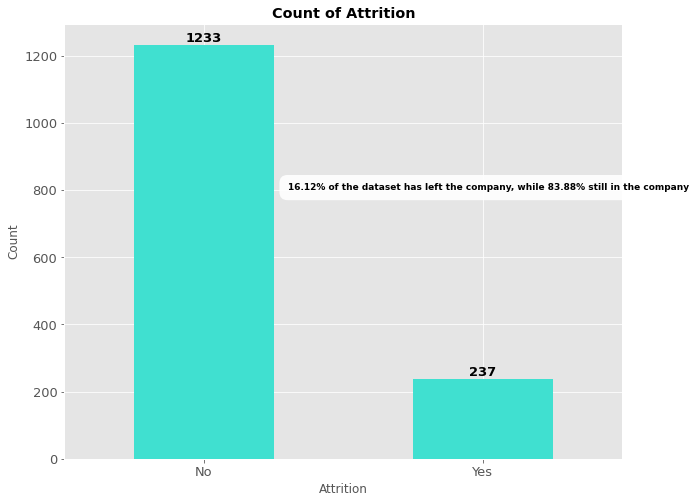

In [170]:
count_attrition = df['Attrition'].value_counts()
total_attrition = count_attrition.sum()

plt.figure(figsize=(10, 8))

bar = count_attrition.plot(kind='bar',  color='turquoise', fontsize=13)
bar.set_xticklabels(count_attrition.index, rotation=0)  # rotate the X legend
bar.set(xlabel='Attrition', ylabel='Count')
plt.title('Count of Attrition', fontweight="black")


for i, v in enumerate(count_attrition):
    bar.text(i, v, str(v)
             , ha='center', va='bottom', fontsize=13, fontweight="black")


percent_yes = round((count_attrition['Yes'] / total_attrition*100), 2)
percent_no = round((count_attrition['No'] / total_attrition*100), 2)

bar.text(0.3, 800, 
         f'{percent_yes:.2f}% of the dataset has left the company, while {percent_no:.2f}% still in the company', 
         bbox={'facecolor': 'white', 'alpha':0.9, 'pad':0.9, 'edgecolor': 'none', 'boxstyle':'round'}, color='black',
         fontsize=9,fontweight="black")

plt.show()


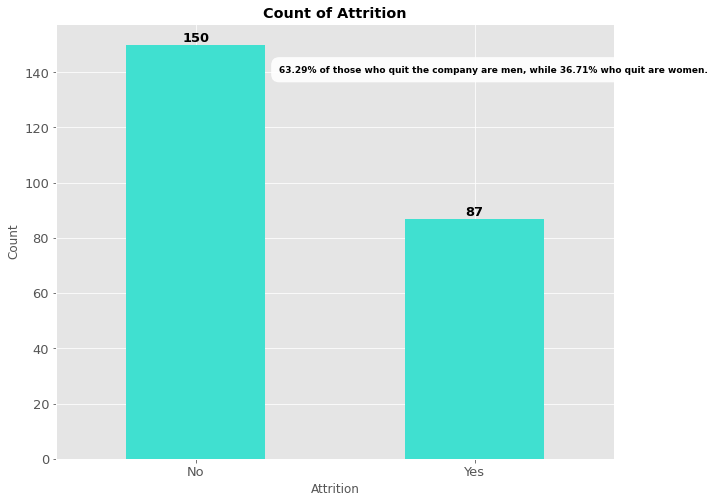

In [171]:
gender_count = df[df["Attrition"] == "Yes"]["Gender"].value_counts()
total_gender = gender_count.sum()

plt.figure(figsize=(10, 8))

bar = gender_count.plot(kind='bar',  color='turquoise', fontsize=13)
bar.set_xticklabels(count_attrition.index, rotation=0)  # rotate the X legend
bar.set(xlabel='Attrition', ylabel='Count')
plt.title('Count of Attrition', fontweight="black")


for i, v in enumerate(gender_count):
    bar.text(i, v, str(v)
             , ha='center', va='bottom', fontsize=13, fontweight="black")


percent_yes = round((gender_count['Male'] / total_gender*100), 2)
percent_no = round((gender_count['Female'] / total_gender*100), 2)

bar.text(0.3, 140, 
         f'{percent_yes:.2f}% of those who quit the company are men, while {percent_no:.2f}% who quit are women.', 
         bbox={'facecolor': 'white', 'alpha':0.9, 'pad':0.9, 'edgecolor': 'none', 'boxstyle':'round'}, color='black',
         fontsize=9,fontweight="black")

plt.show()


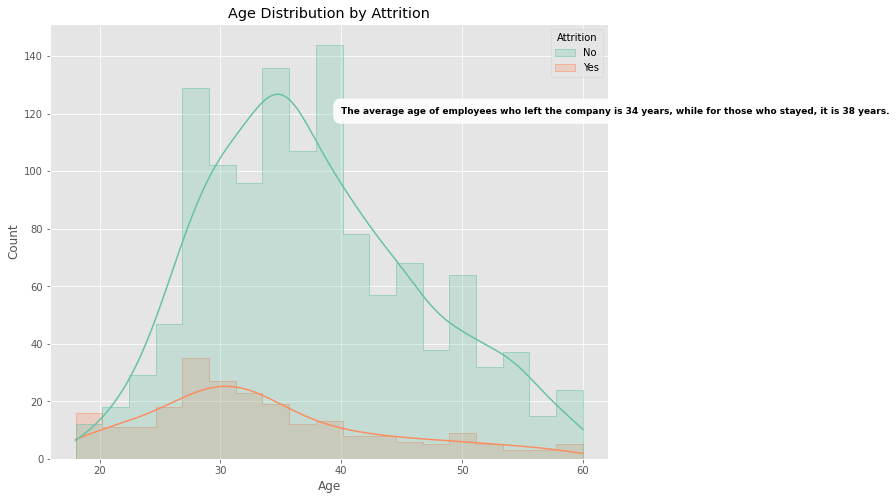

In [172]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='Age', kde=True, hue='Attrition', element='step', common_norm=False, palette='Set2')
plt.title('Age Distribution by Attrition')


# Text box
x_coord = 40
y_coord = 120

text = f'The average age of employees who left the company is {df[df["Attrition"] == "Yes"]["Age"].mean():.0f} years, while for those who stayed, it is {df[df["Attrition"] == "No"]["Age"].mean():.0f} years.'

plt.text(x_coord, y_coord, text, bbox=dict(facecolor='white', alpha=0.9, pad=0.9, edgecolor='none', boxstyle='round'), color='black', fontsize=9, fontweight="bold")

plt.show()

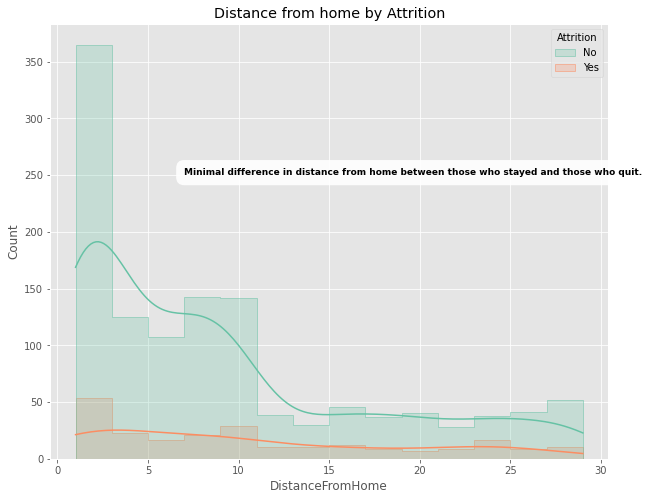

In [173]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='DistanceFromHome', kde=True, hue='Attrition', element='step', common_norm=False, palette='Set2')
plt.title('Distance from home by Attrition')

# Text box
x_coord = 7
y_coord = 250

text = f'Minimal difference in distance from home between those who stayed and those who quit.'

plt.text(x_coord, y_coord, text, bbox=dict(facecolor='white', alpha=0.9, pad=0.9, edgecolor='none', boxstyle='round'), color='black', fontsize=9, fontweight="bold")

plt.show()

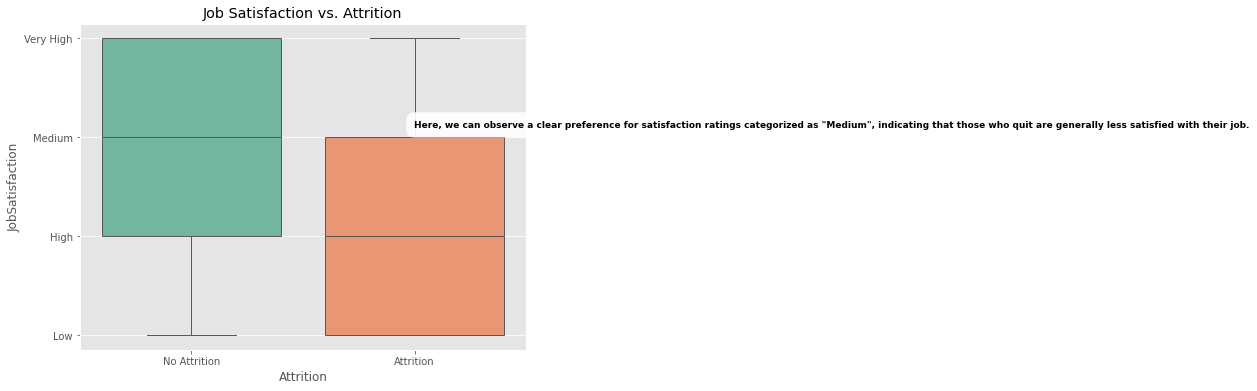

In [174]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='JobSatisfaction', x = "Attrition", palette='Set2',  hue = "Attrition")
plt.title('Job Satisfaction vs. Attrition')
plt.xticks([0, 1], ['No Attrition', 'Attrition'])

# Text box
x_coord = 1
y_coord = 0.9

text = f'Here, we can observe a clear preference for satisfaction ratings categorized as "Medium", indicating that those who quit are generally less satisfied with their job.'

plt.text(x_coord, y_coord, text, bbox=dict(facecolor='white', alpha=0.9, pad=0.9, edgecolor='none', boxstyle='round'), color='black', fontsize=9, fontweight="bold")

plt.show()

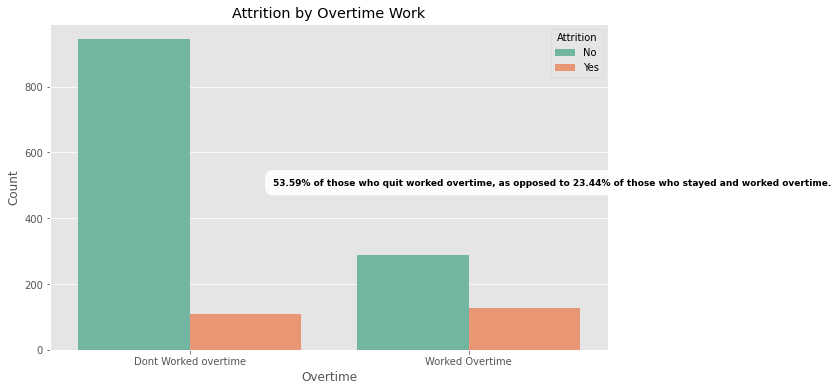

In [175]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='Set2')
plt.title('Attrition by Overtime Work')
plt.xlabel('Overtime')
plt.ylabel('Count')
plt.xticks([0, 1], ['Dont Worked overtime', 'Worked Overtime'])



count_overtime_yes = df[df["Attrition"] == "Yes"]["OverTime"].value_counts()
total_overtime_yes = count_overtime_yes.sum()

count_overtime_no = df[df["Attrition"] == "No"]["OverTime"].value_counts()
total_overtime_no = count_overtime_no.sum()

percent_overtime_yes = round((count_overtime_yes['Yes'] / total_overtime_yes*100), 2)
percent_overtime_no = round((count_overtime_no['Yes'] / total_overtime_no*100), 2)

# Text box
x_coord = 0.3
y_coord = 500

text = f'{percent_overtime_yes}% of those who quit worked overtime, as opposed to {percent_overtime_no}% of those who stayed and worked overtime.'

plt.text(x_coord, y_coord, text, bbox=dict(facecolor='white', alpha=0.9, pad=0.9, edgecolor='none', boxstyle='round'), color='black', fontsize=9, fontweight="bold")

plt.show()

## 4. Conclusion

- Gender Disparity: More males leave the company compared to females. This suggests that there might be gender-related factors influencing attrition rates. It would be essential to investigate further to understand why this disparity exists and whether it's related to job satisfaction, work conditions, or other factors.

- Overtime Work: Employees who quit tend to work overtime more frequently. This indicates that excessive overtime work might contribute to higher turnover rates. It's worth considering whether the company's workload, expectations, or work-life balance policies need to be adjusted.

- Job Satisfaction: Employees who leave the company have job satisfaction falling within the "Medium" range or lower. Low job satisfaction is a well-known factor contributing to employee turnover. It's crucial to identify the specific reasons for job dissatisfaction, such as management issues, work environment, or compensation, and address these concerns.

- Years in Current Role: Employees with less than five years in their current role are more likely to leave. This suggests that employees might be leaving for career exploration or because they are dissatisfied with their current role. Understanding the factors that make them leave, and whether there are opportunities for career growth or development within the company, is essential.

It's also to review your company's HR policies, compensation packages, and diversity and inclusion initiatives to create a more inclusive and supportive workplace for all employees.